###  70-30 training and testing split ratio

In [ ]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

In [ ]:
## Importing the dataset
df = pd.read_csv('cleaned.csv',header=0)

In [ ]:
df.drop(['Year'],axis=1, inplace=True)

In [ ]:
df.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
0,Chefe Donsa,Black Soil,31.0,13.0,811.2,68.0,980.0
1,Chefe Donsa,Black Soil,30.5,16.0,811.2,72.0,670.0
2,Chefe Donsa,Black Soil,29.5,14.0,811.2,68.0,730.0
3,Chefe Donsa,Black Soil,30.0,13.0,811.2,54.0,710.0
4,Chefe Donsa,Black Soil,31.0,12.0,811.2,70.0,780.0


In [ ]:
### Separating Independent and Dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:, 6]

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Location_Alemtena,Location_Chefe Donsa,Location_DZ-BS,Location_DZ-LS,Location_Denkaka,Location_Minjar,Soil Type_Light Soil
0,31.0,13.0,811.2,68.0,0,1,0,0,0,0,0
1,30.5,16.0,811.2,72.0,0,1,0,0,0,0,0
2,29.5,14.0,811.2,68.0,0,1,0,0,0,0,0
3,30.0,13.0,811.2,54.0,0,1,0,0,0,0,0
4,31.0,12.0,811.2,70.0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# print the number of instances of the training and testing set(70-30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5653, 11)
(2424, 11)
(5653,)
(2424,)


### Model Building with Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

MSE = 465030.72671176656
MAE = 472.21743725637447
R2 Score = 0.516725621710102


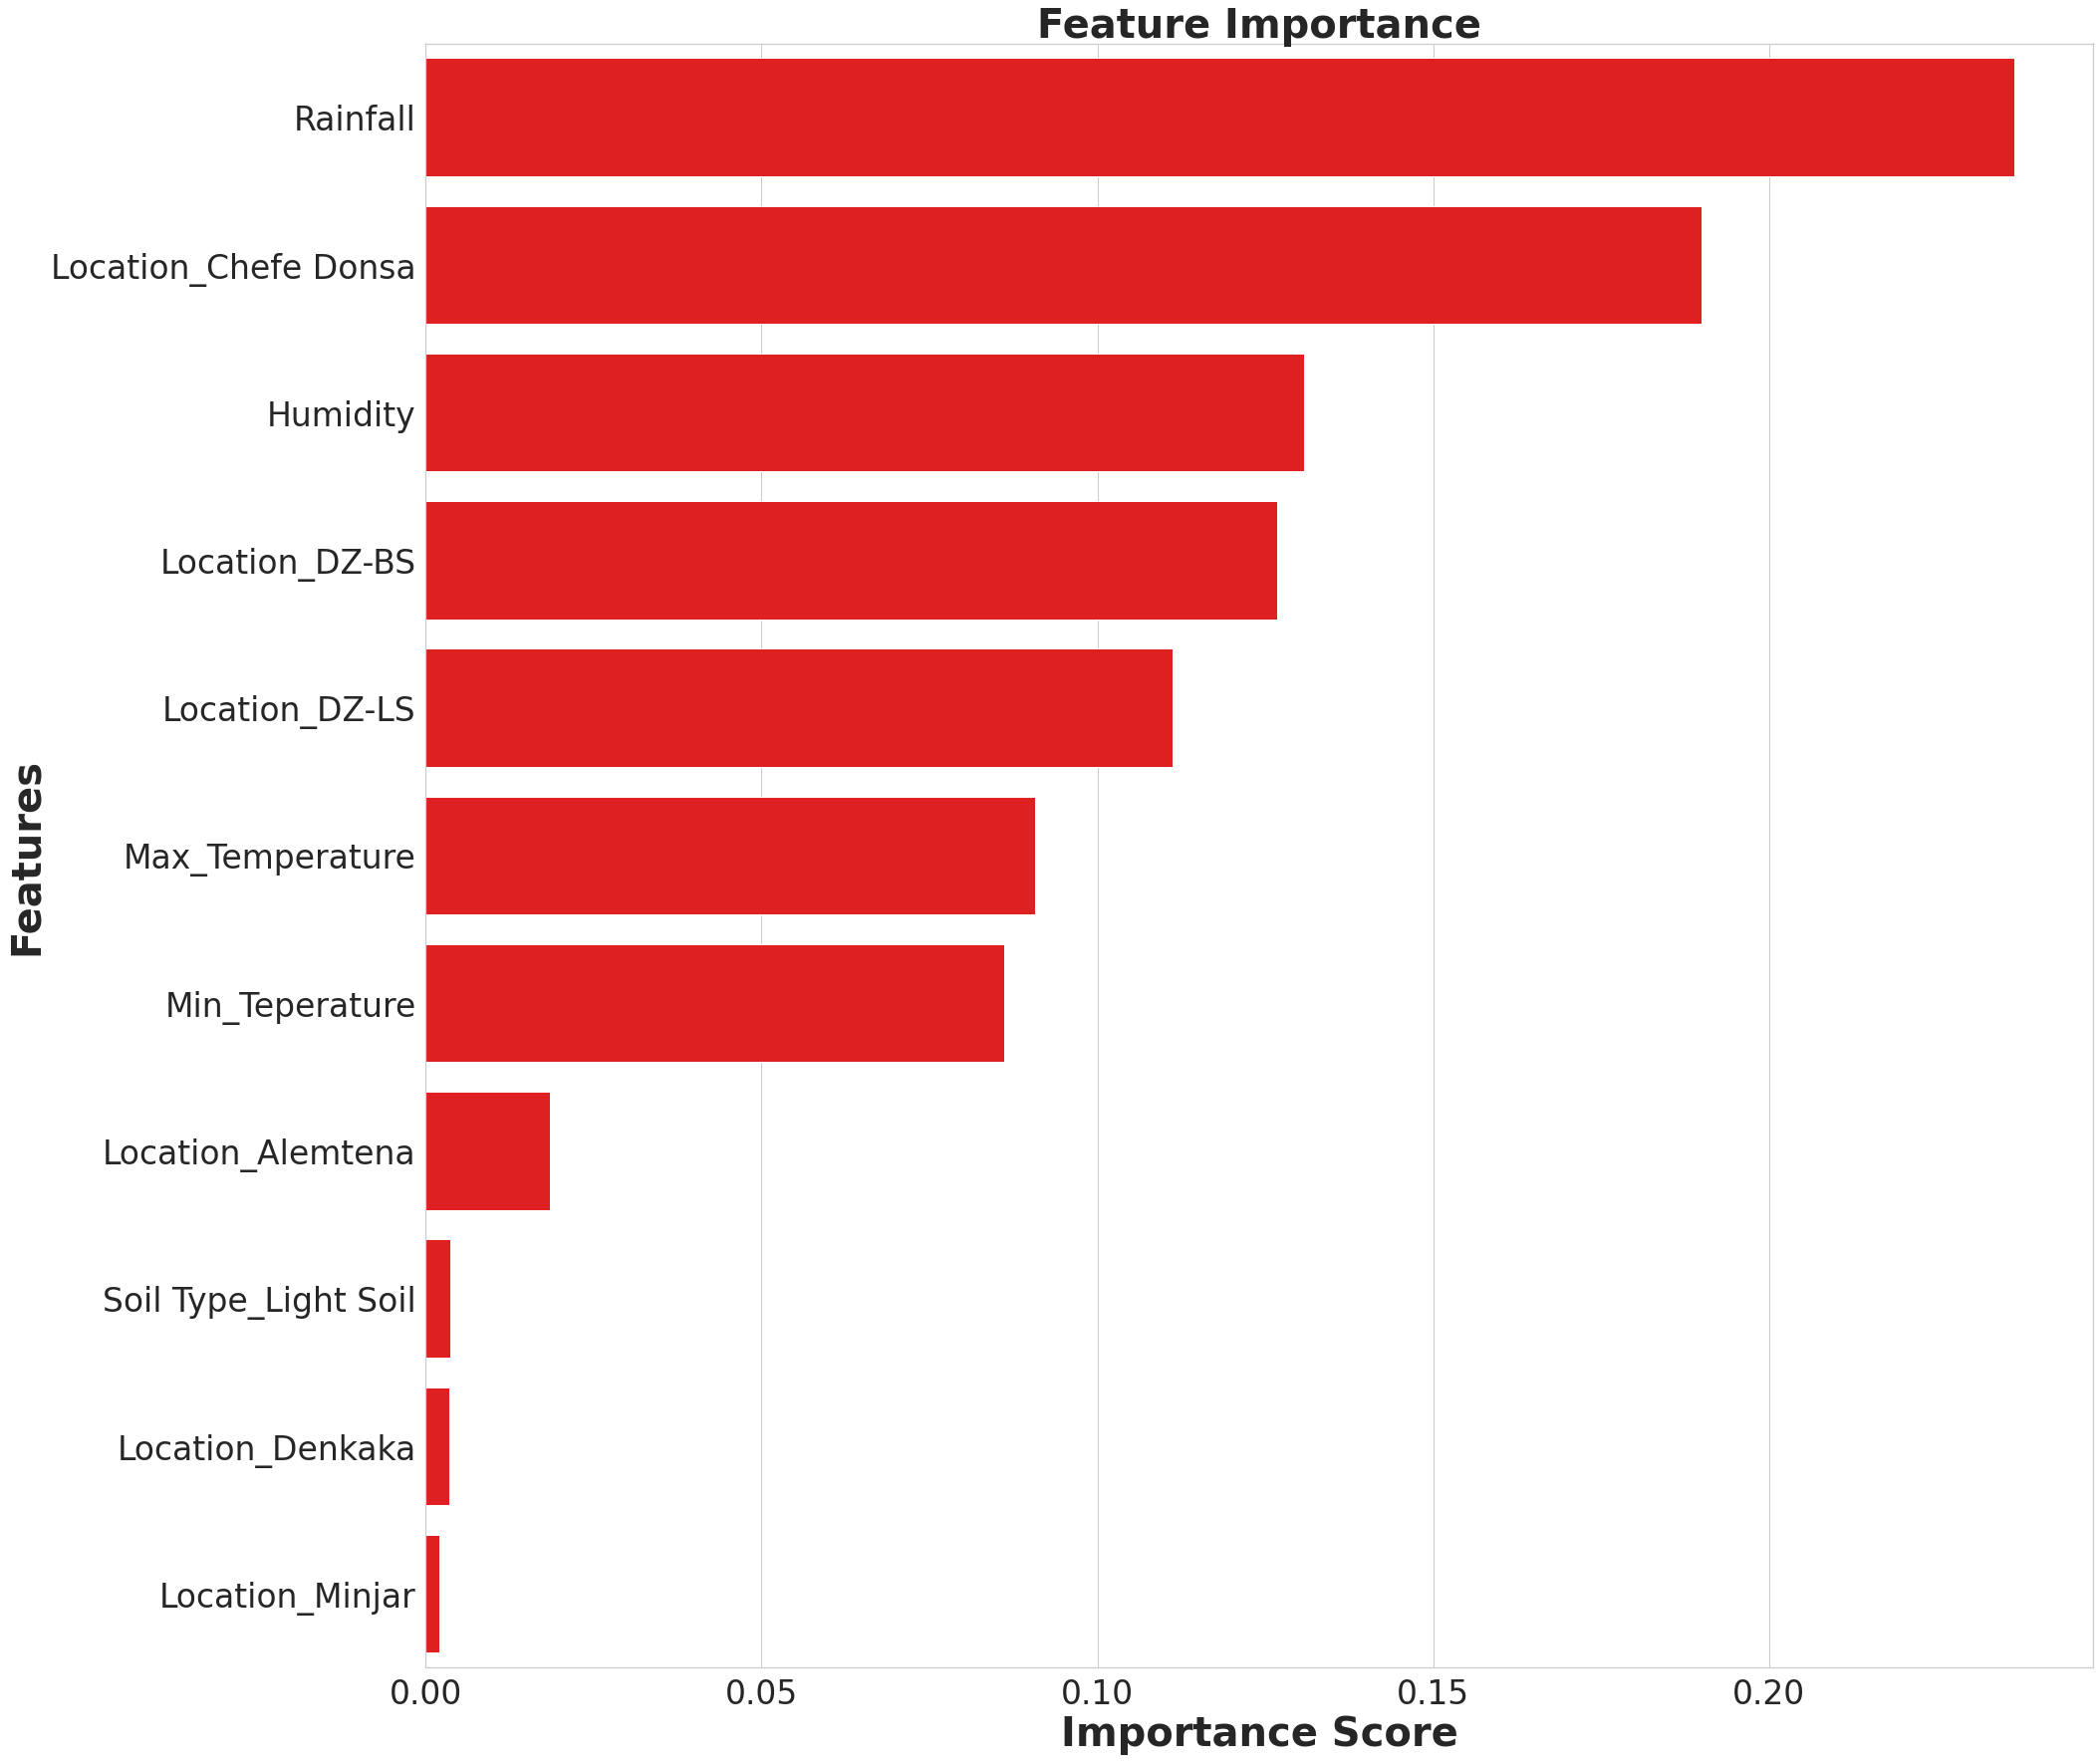

None

In [ ]:
feats = {}
for feature, importance in zip(X.columns, RF.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 20)
sns.set(style="whitegrid", color_codes=True, font_scale = 3)
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='red')
plt.xlabel('Importance Score', fontsize=40, weight = 'bold')
plt.ylabel('Features', fontsize=40, weight = 'bold')
plt.title('Feature Importance', fontsize= 40, weight = 'bold')
display(plt.show())

### Model Building with AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
# AdaBoost algorithm (70-30)
Adb = AdaBoostRegressor()
Adb.fit(X_train, y_train)
pred = Adb.predict(X_test)

print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

MSE = 527196.5819416496
MAE = 558.7454144214663
R2 Score = 0.23034160707269147


### Model Building with GradientBoostingRegressor

In [ ]:
# GradientBoosting(70-30)
from sklearn.ensemble import GradientBoostingRegressor
import time
start_time = time.time()
GB = GradientBoostingRegressor() 
GB.fit(X_train, y_train) 
   
# Predicting the Test set results 
y_pred = GB.predict(X_test)

print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))

MSE = 415902.52444895636
MAE = 465.39805688694594
R2 Score = 0.4609145039215039


In [ ]:
import xgboost as xgb
import time
start_time = time.time()
model = xgb.XGBRegressor()
# feeding the training data into the model
model.fit(X_train, y_train)
# predicting the values for x-test
pred=model.predict(X_test)
print("Execution time: " + str((time.time() - start_time)) + ' sec')


print('MSE =', mse(pred, y_test))
print('MAE =', mae(pred, y_test))
print('R2 Score =', r2_score(pred, y_test))

[03:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Execution time: 0.3767998218536377 sec
MSE = 417186.0207014732
MAE = 466.83571852630513
R2 Score = 0.4612658223398932


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)